In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = fetch_california_housing(as_frame=True)

In [3]:
# Access the DataFrame containing the data
df = data['data']

# Access the target variable (median house value)
target = data['target']


In [4]:
df = pd.concat([df, target],axis=1)

In [5]:
# Introduce missing values randomly
np.random.seed(42)  # Set a seed for reproducibility
mask = np.random.rand(*df.shape) < 0.2  # Adjust the threshold to control the amount of missing data
data_with_missing = df.mask(mask)

# Convert masked array to DataFrame
data_with_missing = pd.DataFrame(data_with_missing, columns=df.columns)

In [6]:
data_with_missing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,NaN,NaN,NaN,-122.23,4.526
1,8.3014,NaN,6.238137,0.971880,2401.0,NaN,NaN,-122.22,3.585
2,7.2574,52.0,8.288136,NaN,496.0,2.802260,37.85,-122.24,NaN
3,5.6431,52.0,NaN,1.073059,NaN,NaN,37.85,-122.25,3.413
4,3.8462,NaN,6.281853,1.081081,NaN,2.181467,NaN,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,NaN,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,NaN,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,NaN,2.325635,NaN,-121.22,0.923
20638,1.8672,18.0,5.329513,NaN,NaN,2.123209,39.43,-121.32,NaN


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class NullDetector:
    """
    A class for detecting and visualizing null values in a DataFrame.
    """
    
    def __init__(self):
        pass

    def detect_nulls(self, df):
        """
        Detects and visualizes null values in a DataFrame.
        
        Args:
            df (pandas.DataFrame): The DataFrame to analyze.
        """
        # Count of all null values in dataframe columns
        null_count = df.isnull().sum()
        
        # Calculate the percentage of null values in each column
        null_percentage = (df.isnull().sum() / df.shape[0]) * 100
    
        # Create a dataframe for output
        null_df = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})
        
        print("Number and percentage of null values in df columns:")
        print(null_df)
    
        # Nullity matrix to find null value in dataframe
        plt.figure(figsize=(15, 10))
        sns.heatmap(df.isnull(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
        plt.title("Nullity Matrix")
        plt.xlabel("Columns")
        plt.ylabel("Rows")
        plt.show()


In [8]:
null_detector = NullDetector()

Number and percentage of null values in df columns:
             Null Count  Null Percentage
MedInc             4052        19.631783
HouseAge           4113        19.927326
AveRooms           4094        19.835271
AveBedrms          4166        20.184109
Population         4144        20.077519
AveOccup           4166        20.184109
Latitude           4111        19.917636
Longitude          4083        19.781977
MedHouseVal        4159        20.150194


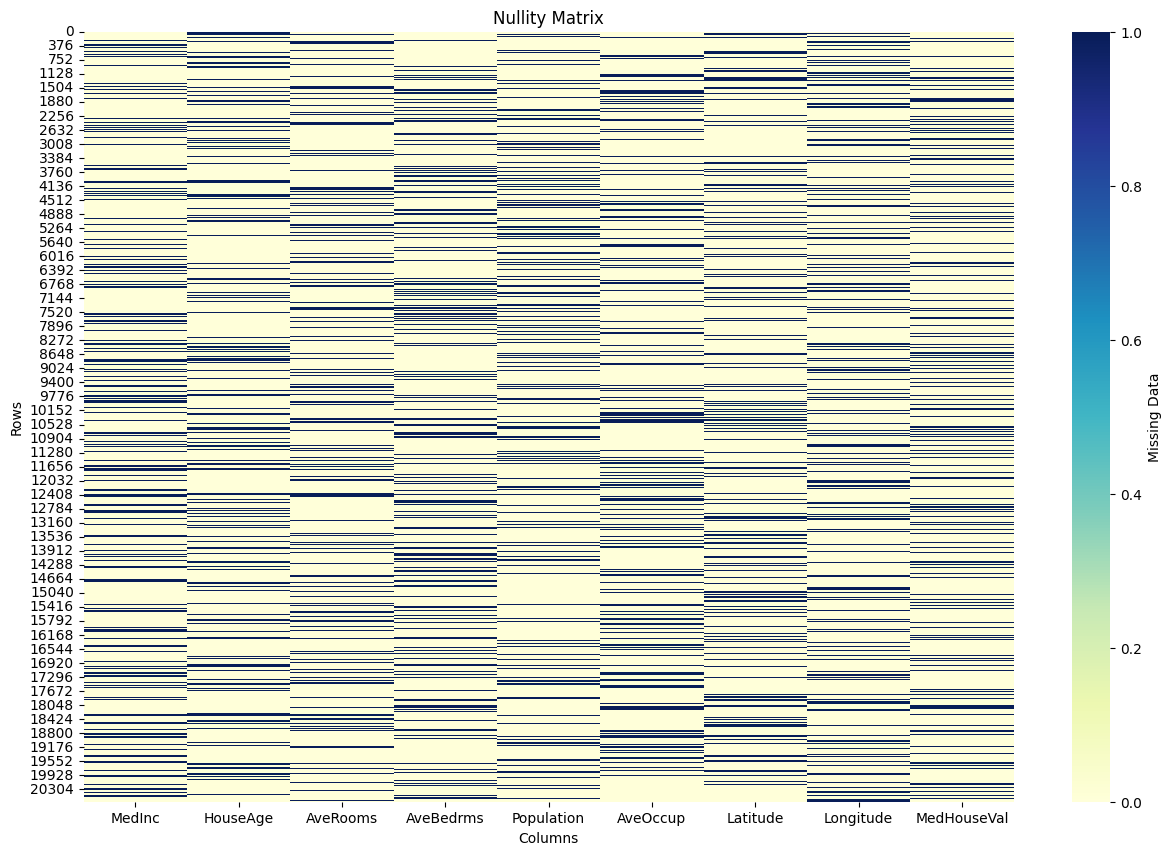

In [9]:
null_detector.detect_nulls(data_with_missing)